In [1]:
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt

import multipolefield as mpf

In [2]:
# Generate some magnetic fields
magfield = mpf.Bfield([0.,0.,1.], jnp.array([1.,0.5,0.5]))
pure_dip = mpf.Bfield([0.,0.,1.], jnp.array([1.,0.,0.]))

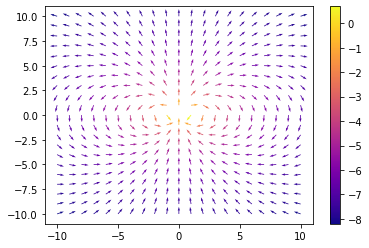

In [3]:
# Make a mesh for 2D plotting
xs = jnp.linspace(-10.,10.,21)
ys = jnp.zeros_like(xs)
zs = jnp.linspace(-10.,10.,21)

Xs, Zs = jnp.meshgrid(xs, zs, indexing='ij')

# Generate the vectorized functions from the scalar functions
magfield_vNv = jax.vmap(magfield.vector, in_axes=(0,None,0), out_axes=0)
magfield_mNm = jax.vmap(magfield_vNv, in_axes=(1,None,1), out_axes=0)

bfield_mNm_norms = jnp.linalg.norm(magfield_mNm(Xs, 0.0, Zs), axis=0).T

plt.quiver(Zs, Xs, \
        magfield_mNm(Xs, 0.0, Zs)[0]/bfield_mNm_norms.T, magfield_mNm(Xs, 0.0, Zs)[2]/bfield_mNm_norms.T, \
        jnp.log(bfield_mNm_norms), cmap='plasma')
plt.colorbar()

In [4]:
tilted_dipole = mpf.Bfield([0., 0.0, 1.0], jnp.array([1.,0.,0.]))

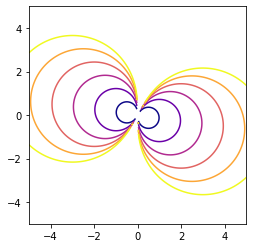

In [7]:
xs = jnp.linspace(-5.,5.,301)
zs = jnp.linspace(-5.,5.,301)

Xs, Zs = jnp.meshgrid(xs, zs, indexing='ij')

fieldline_vNv = jax.vmap(tilted_dipole.fieldline_coordinate, in_axes=(0,None,0), out_axes=0)
fieldline_mNm = jax.vmap(fieldline_vNv, in_axes=(1,None,1), out_axes=0)

plt.contour(Zs, Xs, fieldline_mNm(Xs, 0.0, Zs), [1.0, 2.0, 3.0, 4.0, 5.0, 6.0], cmap='plasma')
plt.gca().set_aspect('equal', adjustable='box')
plt.show()